In [1]:
import pandas as pd
import numpy as np

# Leemos los datos

In [2]:
missing_values = ['n/a', 'na']
df_train = pd.read_csv('titanic/train.csv', na_values = missing_values)
df_test = pd.read_csv('titanic/test.csv')

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
hist = df_train.hist(bins=20)

# Limpiamos y procesamos los datos

In [6]:
def categorical_to_numerical(data_pd):
    data_pd['Sex'] = data_pd['Sex'].map({'male':0, 'female':1})
    data_pd['Embarked'] = data_pd['Embarked'].map({'C':0, 'Q':1, 'S':2})
    
    return data_pd

In [7]:
import pandas.api.types as ptypes

def test_categorical_to_numerical():
    df = pd.DataFrame({"PassengerId": [1, 2, 3],
                       "Sex": ['lala', 'male', 'female'],
                       "Embarked": ['B', 'C', 'Q']}) #,
                       # "hola": ['a', 'b', 'c']})
    
    df_cleaned = categorical_to_numerical(df)
    
    assert all(ptypes.is_numeric_dtype(df_cleaned[col]) for col in df_cleaned)
    # True
    # assert ptypes.is_string_dtype(df_cleaned['c'])
    # True
    # assert ptypes.is_datetime64_any_dtype(df_cleaned['d'])

test_categorical_to_numerical()

In [8]:
def clean_data(data_pd):
    cleaned_data = data_pd.dropna(axis=0)
    
    return cleaned_data

In [9]:
def test_clean_data():
    df = pd.DataFrame({"PassengerId": [1, np.nan, 3],
                       "Sex": [None, 'male', 'female'],
                       "Embarked": ['B', 'C', 'Q'],
                        "hola": ['null', 'b', 'c']})
    
    df_cleaned = clean_data(df)
    assert df_cleaned.isna().any().any() == False

test_clean_data()

In [ ]:
def remove_duplicate_values():
    

In [ ]:
def test_remove_duplicate_values():

In [10]:
df_train = categorical_to_numerical(df_train)
df_test = categorical_to_numerical(df_test)

df_train = clean_data(df_train)

In [11]:
df_train = df_train.drop(columns=['Name', 'Ticket', 'Cabin'])
df_test = df_test.drop(columns=['Name', 'Ticket', 'Cabin'])

# Matriz de correlacion

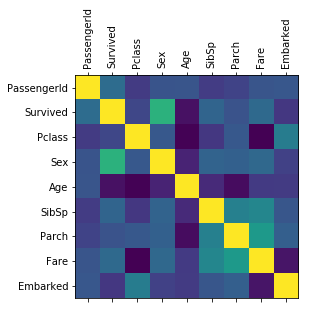

In [12]:
import matplotlib.pyplot as plt

plt.matshow(df_train.corr())
tick_marks = [i for i in range(len(df_train.columns))]
plt.xticks(tick_marks, df_train.columns, rotation='vertical')
plt.yticks(tick_marks, df_train.columns)
plt.show()

In [13]:
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,2,1,1,1,38.0,1,0,71.2833,0.0
3,4,1,1,1,35.0,1,0,53.1000,2.0
6,7,0,1,0,54.0,0,0,51.8625,2.0
10,11,1,3,1,4.0,1,1,16.7000,2.0
11,12,1,1,1,58.0,0,0,26.5500,2.0


# Definimos el modelo

In [44]:
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation
from keras.models import Sequential
from keras import optimizers

In [45]:
y_train = df_train['Survived']
x_train = df_train.drop(columns=['Survived'])
feature_vector_length = x_train.shape[1]

In [99]:
def model_arquitecture():
    model = Sequential()

    model.add(Dense(units=20, input_dim=feature_vector_length, activation='relu'))

    model.add(Dense(10, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(10, activation='relu'))
    # add dropout, default is none
    model.add(Dropout(0.01))

    # create output layer
    model.add(Dense(1, activation='sigmoid'))  # output layer

    sgd = optimizers.SGD(lr=0.01, decay=1e-7, momentum=0.9, nesterov=True)

    model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
    
    return model

# Sobreentrenamos el modelo

In [100]:
model = model_arquitecture()
model.summary()

Model: "sequential_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_175 (Dense)            (None, 20)                180       
_________________________________________________________________
dense_176 (Dense)            (None, 10)                210       
_________________________________________________________________
dense_177 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_178 (Dense)            (None, 10)                110       
_________________________________________________________________
dropout_35 (Dropout)         (None, 10)                0         
_________________________________________________________________
dense_179 (Dense)            (None, 1)                 11        
Total params: 621
Trainable params: 621
Non-trainable params: 0
_______________________________________________________

In [101]:
training = model.fit(x_train[:10], y_train[:10], epochs=100, batch_size=10, validation_split=0, verbose=2)

Epoch 1/100
 - 1s - loss: 3.7048 - acc: 0.3000
Epoch 2/100
 - 0s - loss: 0.6678 - acc: 0.7000
Epoch 3/100
 - 0s - loss: 0.6576 - acc: 0.8000
Epoch 4/100
 - 0s - loss: 0.7113 - acc: 0.7000
Epoch 5/100
 - 0s - loss: 0.5926 - acc: 0.8000
Epoch 6/100
 - 0s - loss: 0.5871 - acc: 0.8000
Epoch 7/100
 - 0s - loss: 0.5875 - acc: 0.8000
Epoch 8/100
 - 0s - loss: 0.5699 - acc: 0.8000
Epoch 9/100
 - 0s - loss: 0.5572 - acc: 0.8000
Epoch 10/100
 - 0s - loss: 0.5867 - acc: 0.8000
Epoch 11/100
 - 0s - loss: 0.5539 - acc: 0.8000
Epoch 12/100
 - 0s - loss: 0.5548 - acc: 0.8000
Epoch 13/100
 - 0s - loss: 0.5423 - acc: 0.8000
Epoch 14/100
 - 0s - loss: 0.5455 - acc: 0.8000
Epoch 15/100
 - 0s - loss: 0.5236 - acc: 0.8000
Epoch 16/100
 - 0s - loss: 0.4936 - acc: 0.8000
Epoch 17/100
 - 0s - loss: 0.5708 - acc: 0.8000
Epoch 18/100
 - 0s - loss: 0.5258 - acc: 0.8000
Epoch 19/100
 - 0s - loss: 0.4823 - acc: 0.8000
Epoch 20/100
 - 0s - loss: 0.5330 - acc: 0.8000
Epoch 21/100
 - 0s - loss: 0.4853 - acc: 0.8000
E

# Entrenamos el modelo

In [103]:
model = model_arquitecture()
model.summary()

Model: "sequential_36"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_180 (Dense)            (None, 20)                180       
_________________________________________________________________
dense_181 (Dense)            (None, 10)                210       
_________________________________________________________________
dense_182 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_183 (Dense)            (None, 10)                110       
_________________________________________________________________
dropout_36 (Dropout)         (None, 10)                0         
_________________________________________________________________
dense_184 (Dense)            (None, 1)                 11        
Total params: 621
Trainable params: 621
Non-trainable params: 0
_______________________________________________________

In [104]:
training = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=2)

Train on 146 samples, validate on 37 samples
Epoch 1/100
 - 1s - loss: 3.9808 - acc: 0.5068 - val_loss: 11.7619 - val_acc: 0.2703
Epoch 2/100
 - 0s - loss: 10.3074 - acc: 0.3425 - val_loss: 11.7619 - val_acc: 0.2703
Epoch 3/100
 - 0s - loss: 10.2366 - acc: 0.3562 - val_loss: 11.7619 - val_acc: 0.2703
Epoch 4/100
 - 0s - loss: 9.8558 - acc: 0.3562 - val_loss: 11.7619 - val_acc: 0.2703
Epoch 5/100
 - 0s - loss: 9.8045 - acc: 0.3630 - val_loss: 11.7619 - val_acc: 0.2703
Epoch 6/100
 - 0s - loss: 9.5420 - acc: 0.3630 - val_loss: 11.3391 - val_acc: 0.2973
Epoch 7/100
 - 0s - loss: 2.9677 - acc: 0.5411 - val_loss: 0.7441 - val_acc: 0.7297
Epoch 8/100
 - 0s - loss: 0.6546 - acc: 0.6438 - val_loss: 0.6077 - val_acc: 0.7297
Epoch 9/100
 - 0s - loss: 0.6369 - acc: 0.6712 - val_loss: 1.0372 - val_acc: 0.7297
Epoch 10/100
 - 0s - loss: 0.7111 - acc: 0.6575 - val_loss: 0.6329 - val_acc: 0.7297
Epoch 11/100
 - 0s - loss: 0.6521 - acc: 0.6575 - val_loss: 0.7089 - val_acc: 0.7297
Epoch 12/100
 - 0s - 

Epoch 97/100
 - 0s - loss: 0.6427 - acc: 0.6575 - val_loss: 0.5952 - val_acc: 0.7297
Epoch 98/100
 - 0s - loss: 0.6427 - acc: 0.6575 - val_loss: 0.5953 - val_acc: 0.7297
Epoch 99/100
 - 0s - loss: 0.6428 - acc: 0.6575 - val_loss: 0.5955 - val_acc: 0.7297
Epoch 100/100
 - 0s - loss: 0.6427 - acc: 0.6575 - val_loss: 0.5953 - val_acc: 0.7297
